## Textual data combination and pre-processing

### Combine the lyrics of the year

The goal of our analysis is to capture the broad trends and general shifts in lyrical content, so it could be more beneficial to combine the preivious scraped lyrics into one single text representing specific year, instead of dealing with almost 100 seperate texts for each year. Here are the pros and cons of our choice. After finishing the general topic modelling, I'll evaluate the result qualitively and decide how should I deal with the latent problems of combing our lyrics yearly.

#### Pros:
<ul>
<li>Aggregated Insights: Combining lyrics into a single text per year can provide a macro view of the dominant themes and topics for that year. This could be useful for observing broad trends in lyrical themes over the years. 
<li>Manageability: Reducing the number of documents (from 2400 to 24) simplifies your dataset, potentially making computational tasks quicker and easier to manage.
<li>Temporal Analysis: It’s easier to perform a time-series analysis to see how certain themes evolve or decline across years.
</ul>

#### Cons:
<ul>
<li>Loss of Detail: Individual nuances and unique themes in specific songs might get lost when aggregated.
<li>Uneven Text Length: If the number of words per song varies significantly, some themes might be overrepresented simply because they appear in longer songs.
</ul>


It is also notable that before combing the lyrics, I deleted the first line of all the files with an if condition when reading the files, because they are default headings generated by Genius.com while scraping, which are useless information. The scraped contents also all end with a word "Embed", which will be added it to the stop word list and then removed.

After this procedure, the lyrics are saved in 24 plain texts, with the naming pattern "combined_year".

In [7]:
import os
import glob

base_path = '/Users/delete4ever/Desktop/Digital Literary Analysis/codes/Lyrics'  

def combine_lyrics(year):
    folder_path = os.path.join(base_path, str(year))  # Construct the path to each year's folder
    files = glob.glob(os.path.join(folder_path, '*.txt'))  # List all text files in the folder
    combined_text = ""
    
    for file in files:
        with open(file, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            if len(lines) > 1:
                content = ''.join(lines[1:])  # Join all but the first line
            else:
                content = ''  # If there's only one line or none, set content to empty
            combined_text += content + " "  # Add space between files
    return combined_text

def save_combined_text(year, text):
    with open(os.path.join(base_path, f"combined_{year}.txt"), 'w', encoding='utf-8') as f:
        f.write(text)

# Loop through each year from 2000 to 2023
for year in range(2000, 2024):
    combined_text = combine_lyrics(year)
    save_combined_text(year, combined_text)  # Save the combined text in a new file
    print(f"Processed and saved combined lyrics for the year {year}")

Processed and saved combined lyrics for the year 2000
Processed and saved combined lyrics for the year 2001
Processed and saved combined lyrics for the year 2002
Processed and saved combined lyrics for the year 2003
Processed and saved combined lyrics for the year 2004
Processed and saved combined lyrics for the year 2005
Processed and saved combined lyrics for the year 2006
Processed and saved combined lyrics for the year 2007
Processed and saved combined lyrics for the year 2008
Processed and saved combined lyrics for the year 2009
Processed and saved combined lyrics for the year 2010
Processed and saved combined lyrics for the year 2011
Processed and saved combined lyrics for the year 2012
Processed and saved combined lyrics for the year 2013
Processed and saved combined lyrics for the year 2014
Processed and saved combined lyrics for the year 2015
Processed and saved combined lyrics for the year 2016
Processed and saved combined lyrics for the year 2017
Processed and saved combined

### Text Cleansing and Pre-processing

Here we follow a standard natural language processing pipeline, in which we use the `nltk` package. We first tokenize the our texts, then filter out the stopwords in English, Spanish and French, and manually add the commmon filler words in lyrics to the custom stop words list, lastly we lemmatize the texts and finish the pre-processing. 

The clean texts are subsequently saved in 24 plain text files, with the naming patter "cleaned_year".

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+|\d+', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english')) | set(stopwords.words('spanish'))| set(stopwords.words('french'))
    custom_stopwords = ['embed','feat','featuring','oh','na','da','yeah','ba','boo','doo','ey','ay','di','du','eh','da','pa','ooh'] #delete the web generated non-sense and fillers in music
    stop_words.update(custom_stopwords)
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_text)


sample_text = "Here's an example: Running, running, run; 1234! Yo te amo y tú me amas, je t'aime"
cleaned_text = preprocess_text(sample_text)
print(cleaned_text)

example running running run amo amas aime


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/delete4ever/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/delete4ever/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/delete4ever/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
def clean_and_save_yearly_texts(base_path, start_year, end_year):
    for year in range(start_year, end_year + 1):
        file_path = os.path.join(base_path, f'combined_{year}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            cleaned_text = preprocess_text(text)
            with open(os.path.join(base_path, f'cleaned_{year}.txt'), 'w', encoding='utf-8') as output_file:
                output_file.write(cleaned_text)
            print(f'Cleaned and saved text for {year}')

# Specify the path to your directory and the range of years
clean_and_save_yearly_texts(base_path, 2000, 2023)

Cleaned and saved text for 2000
Cleaned and saved text for 2001
Cleaned and saved text for 2002
Cleaned and saved text for 2003
Cleaned and saved text for 2004
Cleaned and saved text for 2005
Cleaned and saved text for 2006
Cleaned and saved text for 2007
Cleaned and saved text for 2008
Cleaned and saved text for 2009
Cleaned and saved text for 2010
Cleaned and saved text for 2011
Cleaned and saved text for 2012
Cleaned and saved text for 2013
Cleaned and saved text for 2014
Cleaned and saved text for 2015
Cleaned and saved text for 2016
Cleaned and saved text for 2017
Cleaned and saved text for 2018
Cleaned and saved text for 2019
Cleaned and saved text for 2020
Cleaned and saved text for 2021
Cleaned and saved text for 2022
Cleaned and saved text for 2023


For the convenience of further processing, we convert the cleaned lyrics into a list of lists `texts`.

In [11]:
def read_and_tokenize(base_path, start_year, end_year):
    texts = []
    for year in range(start_year, end_year + 1):
        file_path = os.path.join(base_path, f'cleaned_{year}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            tokens = word_tokenize(text)
            texts.append(tokens)
    return texts

# Specify the path to your directory and the range of years
texts = read_and_tokenize(base_path, 2000, 2023)
print(len(texts))
print(type(texts))

24
<class 'list'>


## Sentiment Analysis

Here to fulfill our goal of seeing the general sentiment trends reflected by the lyrics, we introduce the python library `textblob`, which can return polarity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. We iterate the function `yearly_sentiment_analysis` over the list of lists `texts`, and get the sentiment analysis result stored in the dictionary `sentiments`.

Then we use `matplotlib` and `seaborn` to visualize the data.

<class 'dict'>


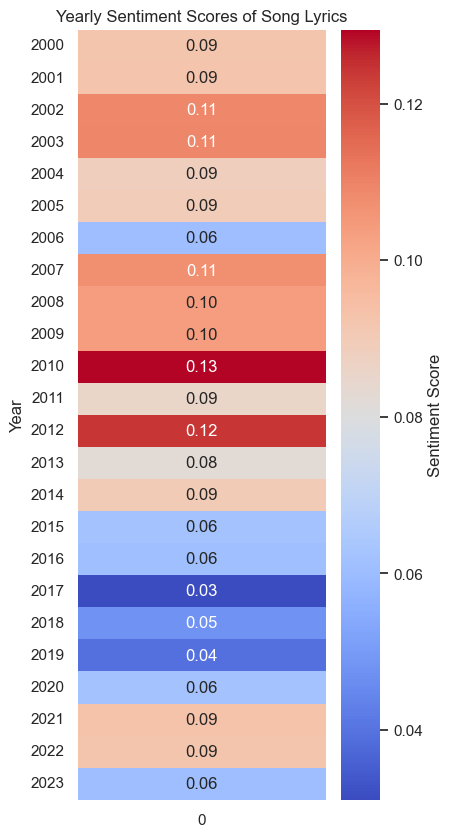

In [12]:
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def yearly_sentiment_analysis(texts):
    yearly_sentiment = {}
    for year, tokens in enumerate(texts, start=2000):
        text = ' '.join(tokens)
        blob = TextBlob(text)
        yearly_sentiment[year] = blob.sentiment.polarity
    return yearly_sentiment

sentiments = yearly_sentiment_analysis(texts)
print(type(sentiments))

years = list(sentiments.keys())
scores = list(sentiments.values())

# Convert scores into a NumPy array and reshape it for a single-column heatmap
scores_array = np.array(scores).reshape(-1, 1)  # Reshape to 24 rows and 1 column
sns.set()  # Use seaborn's default styling

plt.figure(figsize=(4, 10))  # Set the figure size
ax = sns.heatmap(scores_array, annot=True, fmt=".2f", cmap='coolwarm',
                 cbar_kws={'label': 'Sentiment Score'},
                 yticklabels=years)  # Use years as y-tick labels

ax.set_title('Yearly Sentiment Scores of Song Lyrics')
ax.set_ylabel('Year')
plt.show()

## Word Frequency

In this session we try to visualize the changing trends of the frequencies of different keywords over 24 years, and we achieve this goal using `nltk` library. By using the `FreqDist` class and enumerating over 24 words lists contained in `texts`, we then manually put the keywords that interest us in a for loop. 

Here, as examples, we test with words 'love', 'freedom', 'world', 'happy', 'boy', 'girl', 'bitch', 'money', 'baby', 'fuck', 'cry', 'smile', which can in a way reflect people's emotions and some grand topics concerning human's life and value.

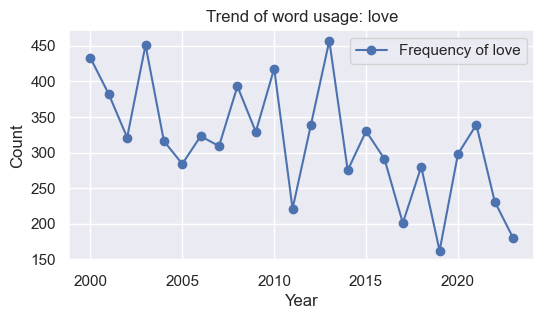

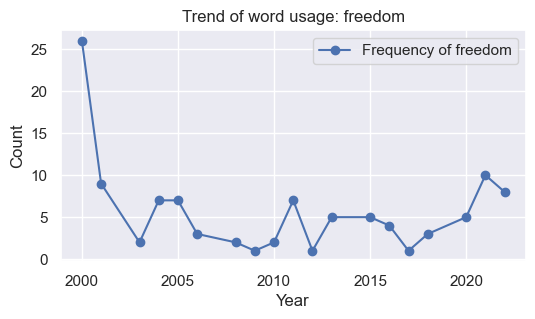

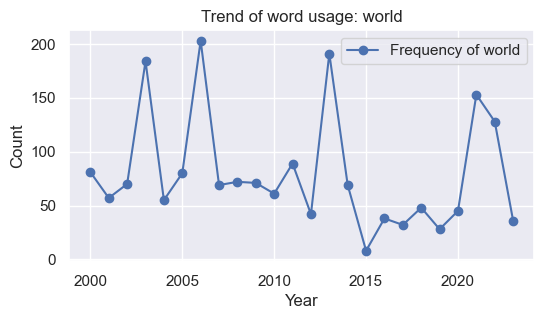

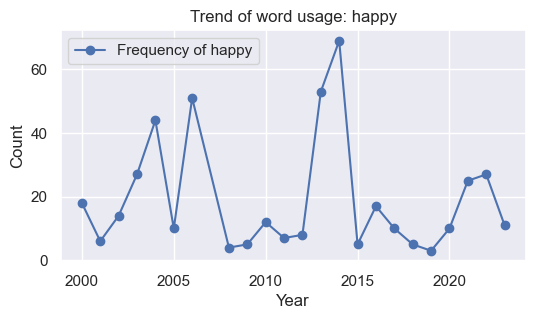

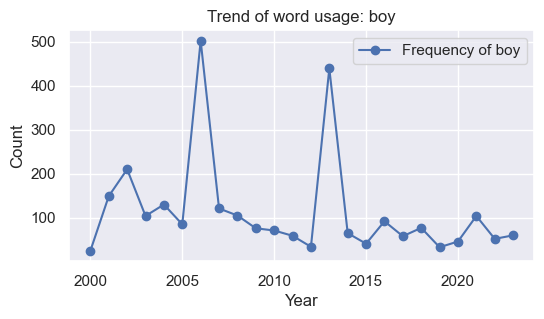

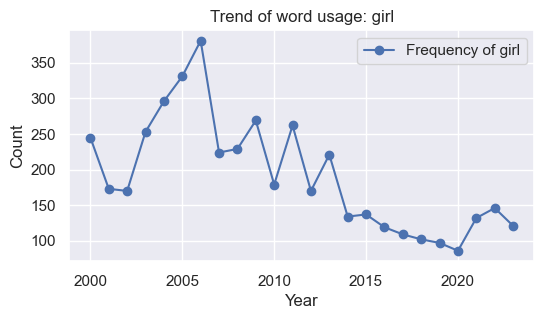

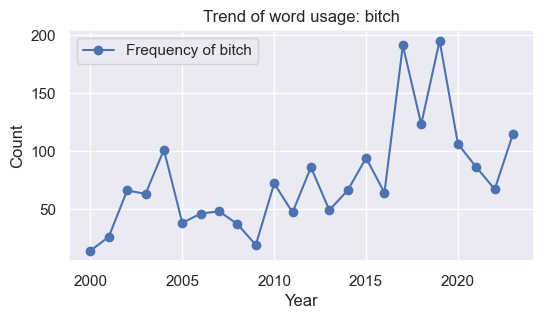

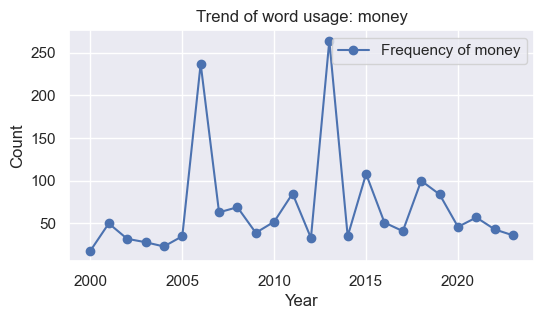

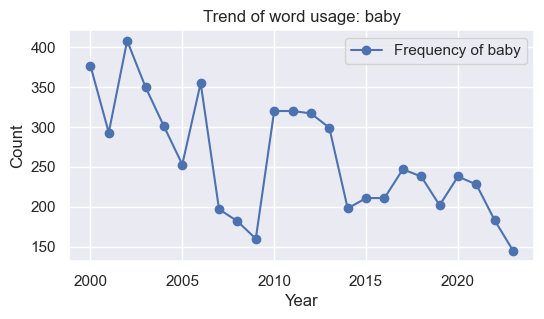

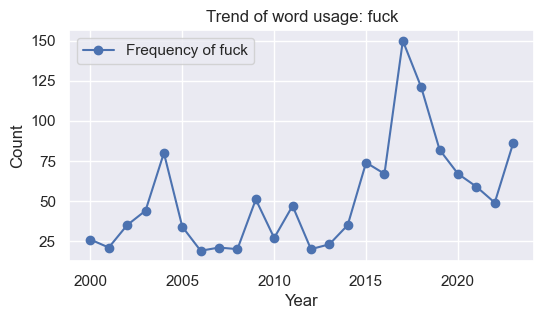

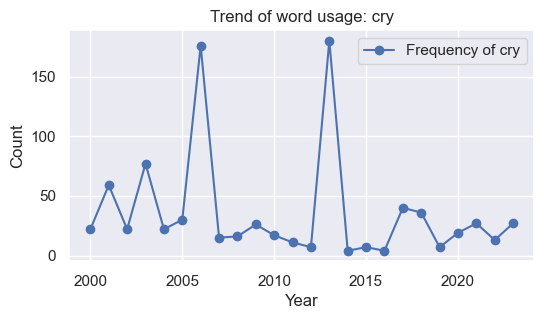

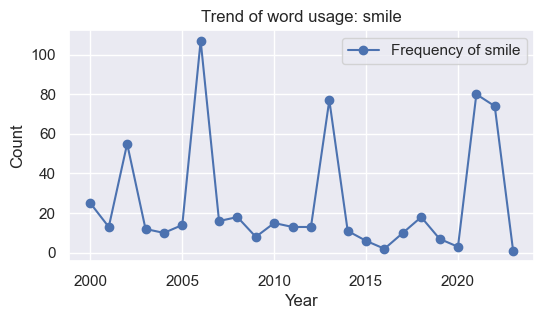

In [13]:
from nltk import FreqDist

def word_frequency_over_time(texts):
    word_trends = {}
    for year, tokens in enumerate(texts, start=2000):
        freq_dist = FreqDist(tokens)
        for word in ['love', 'freedom', 'world','happy','boy','girl','bitch','money','baby','fuck','cry','smile']:  
            if word in freq_dist:
                if word not in word_trends:
                    word_trends[word] = {}
                word_trends[word][year] = freq_dist[word]
    return word_trends

trends = word_frequency_over_time(texts)

for word, data in trends.items():
    years = list(data.keys())
    counts = list(data.values())
    plt.figure(figsize=(6, 3))
    plt.plot(years, counts, marker='o', linestyle='-', label=f'Frequency of {word}')
    plt.title(f'Trend of word usage: {word}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()
    plt.show()



In the following session we want to figure out the most frequent words appeared in lyrics every year, and using the word cloud is an ideal way to visualize this information.

We set the parameter `num_words` to 10 so as to see the top 10 words of each year's lyrics.

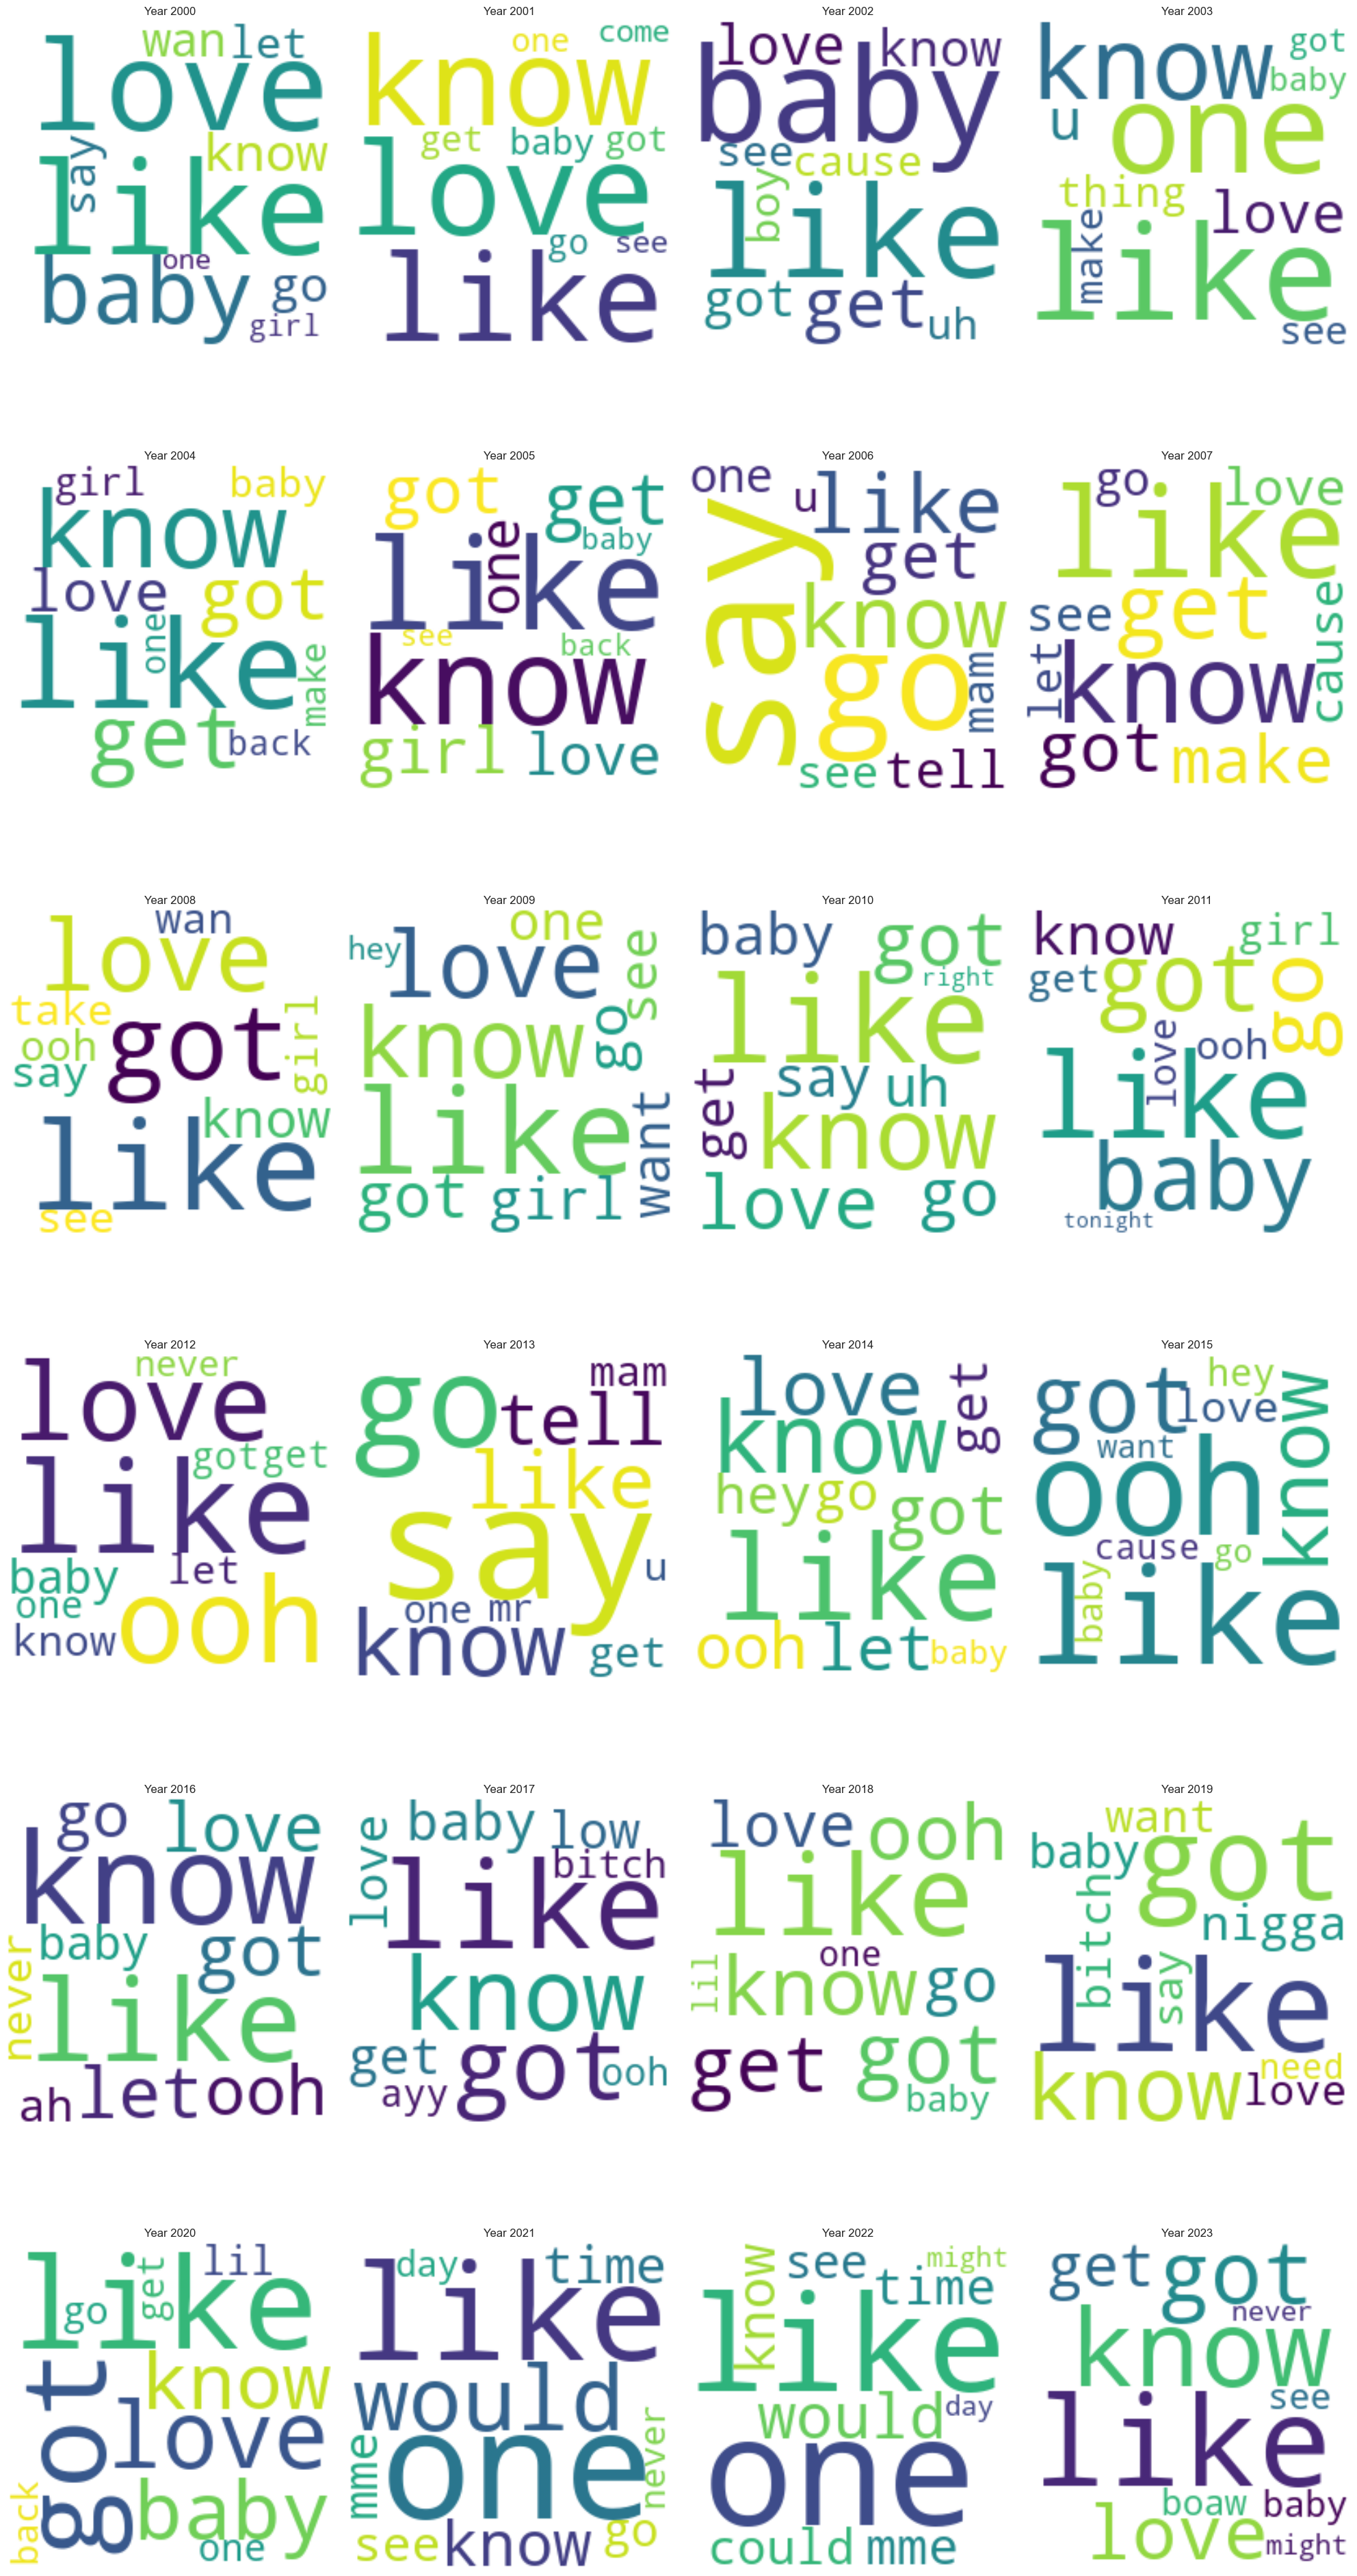

In [14]:
from collections import Counter

def get_top_words(tokens, num_words=10):
    # Calculate word frequencies using a pre-tokenized list of words
    word_freq = Counter(tokens)
    # Return the most common num_words words
    return dict(word_freq.most_common(num_words))

# Assuming 'texts' is a list of lists (each inner list is a year's tokenized lyrics)
top_words_each_year = [get_top_words(year_tokens) for year_tokens in texts]

from wordcloud import WordCloud

# Plot settings
plt.figure(figsize=(20, 40))  # Adjust size to fit all word clouds comfortably

for i, freq in enumerate(top_words_each_year):
    wc = WordCloud(width=200, height=200, background_color='white')
    # Generate word cloud using frequencies
    wc.generate_from_frequencies(freq)
    
    # Plot each word cloud
    plt.subplot(6, 4, i + 1)  # Adjust grid settings depending on number of images
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Year {2000 + i}")

plt.tight_layout()
plt.show()




From the word clouds above, we can see that the top words are predominantly verbs, which can not really reflect the general "topics" of the lyrics. Therefore, to get a clearer vision of topics, which could be more directly reflected throught nouns, we use the `pos_tag` function offered by `nltk`, to add POS tags to all the tokens in the list `texts`, and only keep the nouns left in a new list `nouns_only_texts`.

In [17]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

def extract_nouns_from_tokens(tokens):
    # Apply POS tagging to the list of tokens
    tagged_tokens = pos_tag(tokens)
    # Extract nouns (tags starting with 'NN')
    nouns = [word for word, tag in tagged_tokens if tag.startswith('NN')]
    return nouns

nouns_only_texts = [extract_nouns_from_tokens(text) for text in texts]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/delete4ever/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


We use the same word cloud approach to visualize the top nouns of each year.

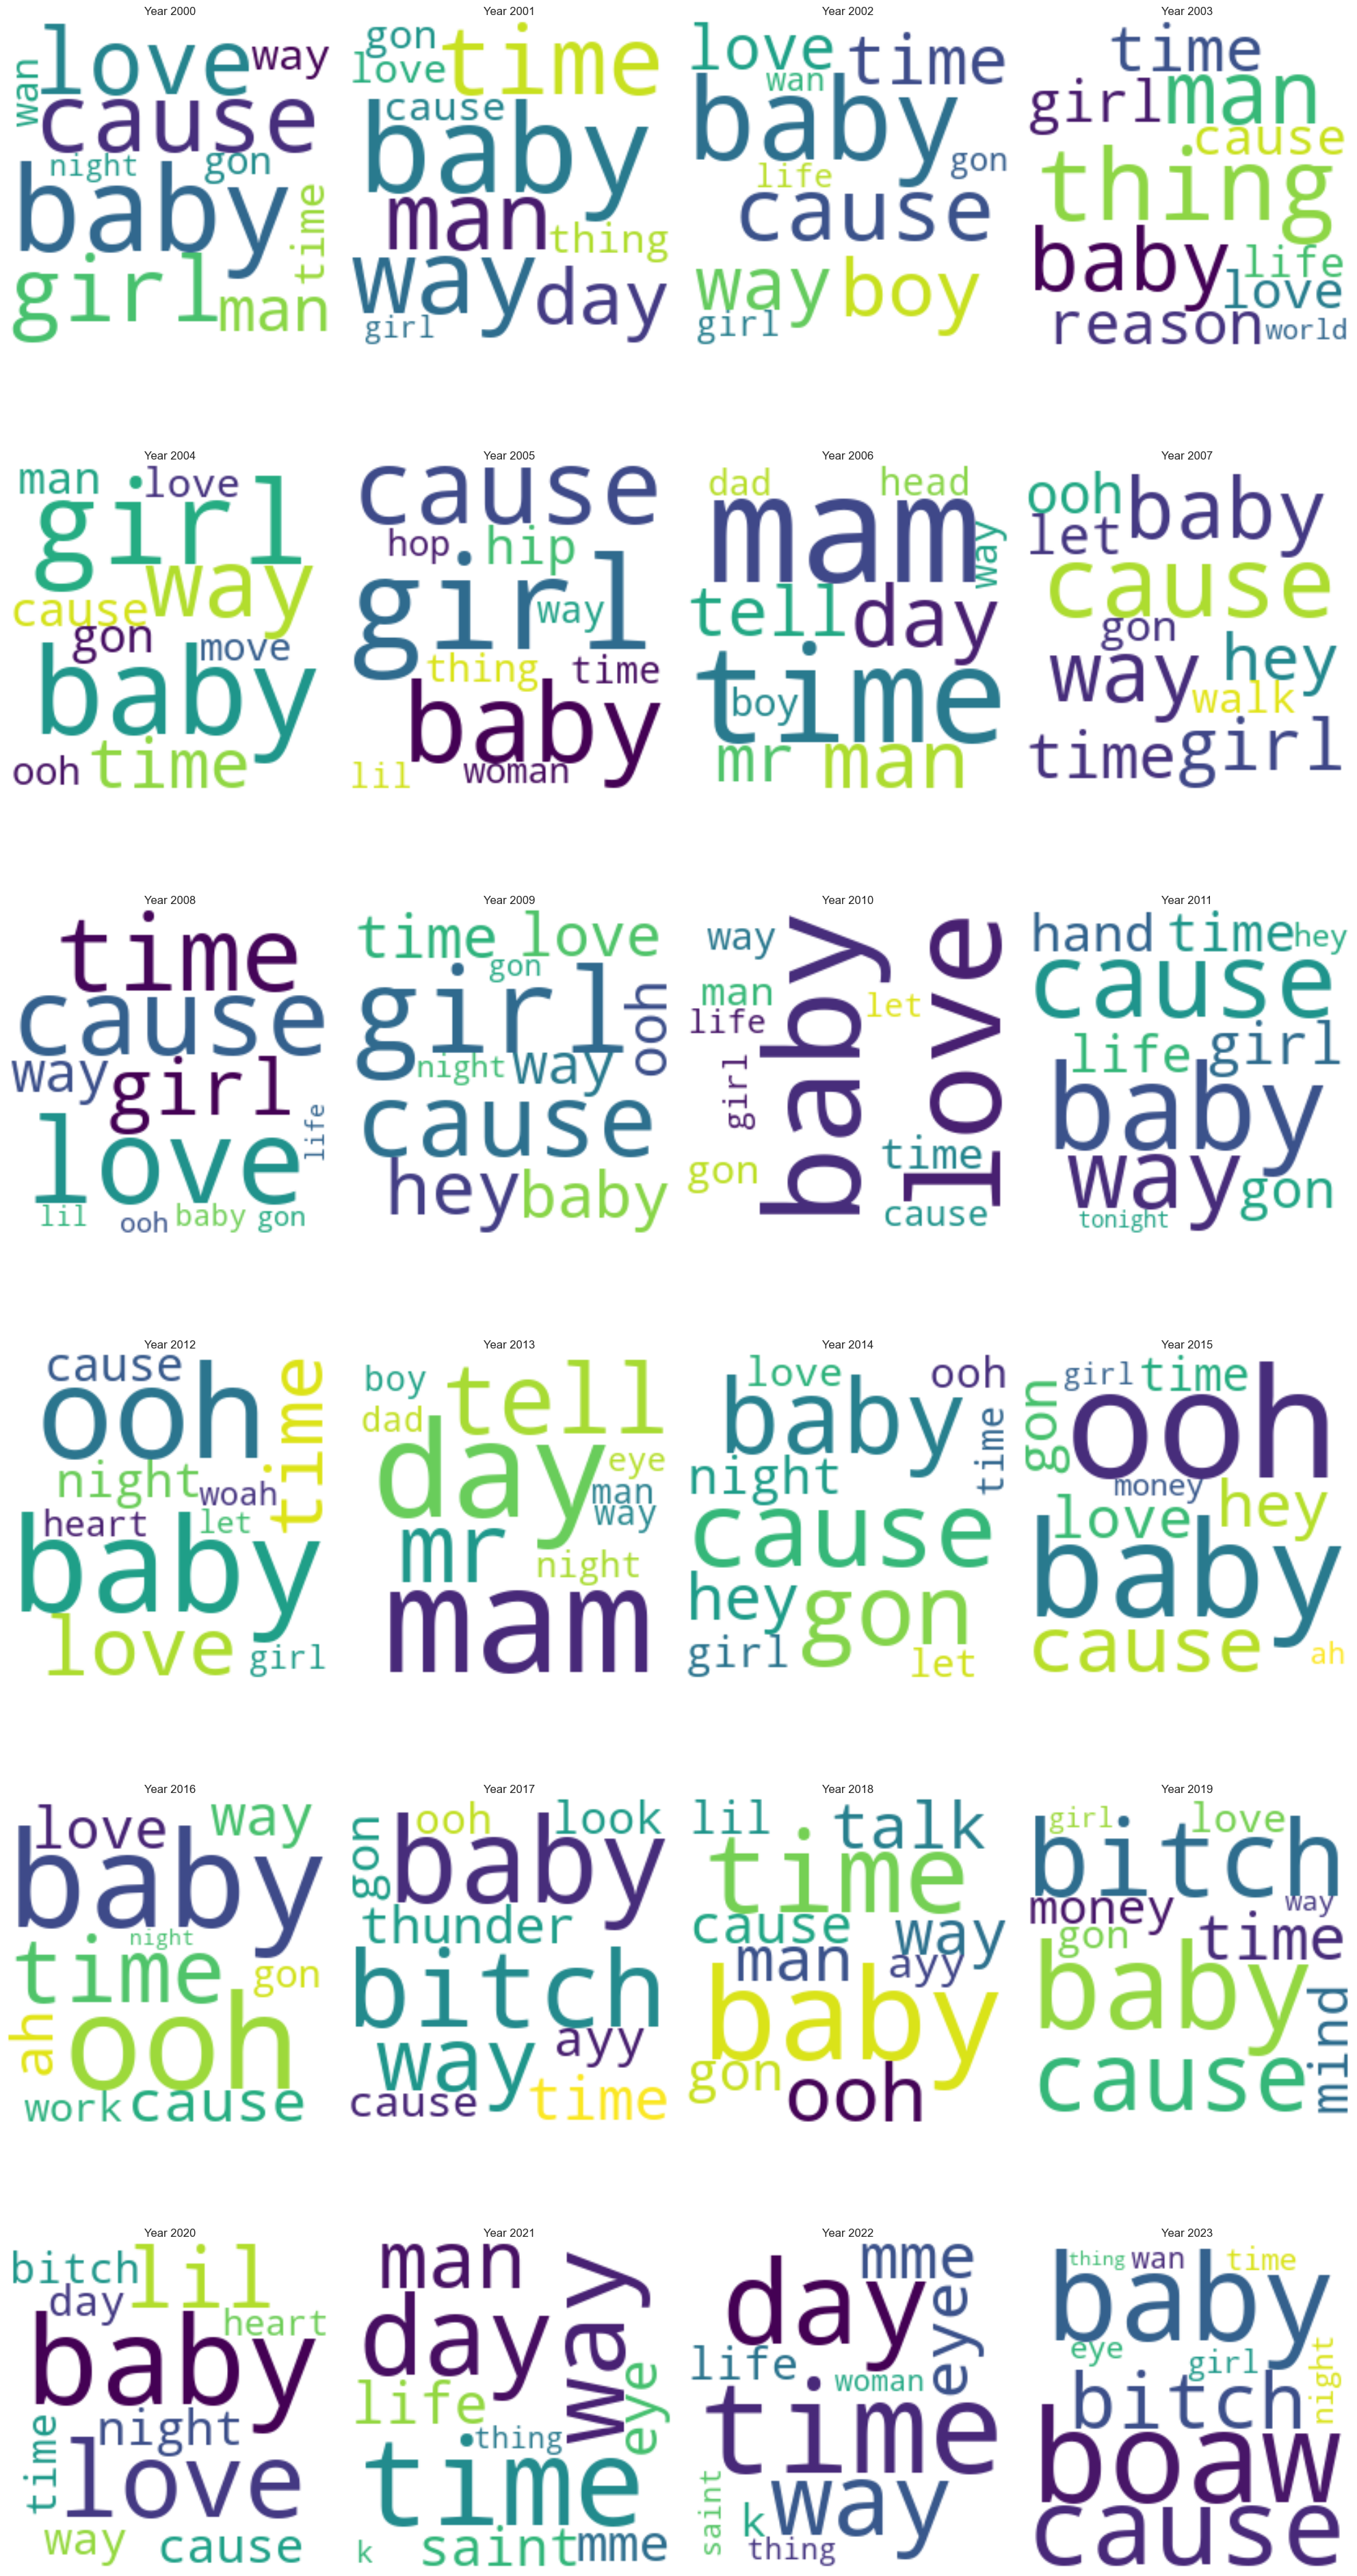

In [18]:
top_nouns_each_year = [get_top_words(year_tokens) for year_tokens in nouns_only_texts]

plt.figure(figsize=(20, 40))  # Adjust size to fit all word clouds comfortably

for i, freq in enumerate(top_nouns_each_year):
    wc = WordCloud(width=200, height=200, background_color='white')
    # Generate word cloud using frequencies
    wc.generate_from_frequencies(freq)
    
    # Plot each word cloud
    plt.subplot(6, 4, i + 1)  
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Year {2000 + i}")

plt.tight_layout()
plt.show()

## Topic modeling Focusing on Nouns

In the last part of the note book we try to conduct the topic modeling on our lyrics, with the hope of seeing some implicit topics and connections in the texts.

Topic modeling is a frequently used approach to discover hidden semantic patterns portrayed by a text corpus and automatically identify topics that exist inside it. Namely, it’s a type of statistical modeling that leverages unsupervised machine learning to analyze and identify clusters or groups of similar words within a body of text. Essentially, topic models work by deducing words and grouping similar ones into topics to create topic clusters.

We use the library `gensim` to make everything needed for topic modeling ready.

In [19]:
from gensim import corpora, models
# Create a dictionary from the texts
dictionary = corpora.Dictionary(nouns_only_texts)

# Filter out words that occur in less than 10 documents or more than 80% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.8)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in nouns_only_texts]

We prepare the training corpus for the unsupervised learning. Before starting, we can see that the number of the unique tokens in the prepared dictionary is pretty limited, which could be used to explain the furthur result retrospectively.

In [22]:
print("Number of unique tokens: %d" % len(dictionary))


Number of unique tokens: 1504


We try to use the technique of Latent Dirichlet Allocation (LDA), which was initially proposed in 2000 in a paper titled “Inference of population structure using multilocus genotype data.” The paper predominantly focused on population genetics, which is a subfield of genetics concerned with genetic differences within and among populations. Three years later, Latent Dirichlet Allocation was applied in machine learning.

LDA is a Bayesian network, meaning it’s a generative statistical model that assumes documents are made up of words that aid in determining the topics. Thus, documents are mapped to a list of topics by assigning each word in the document to different topics. This model ignores the order of words occurring in a document and treats them as a bag of words.

Here we import the ready-to-use `LdaModel` module directly, adjusting the parameters according to basic qualititive evaluations of the trainin results.

In [114]:
# Set training parameters.
num_topics = 8
passes = 3
iterations = 100

# Create an LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary,
                            passes=passes, iterations=iterations)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.021*"saint" + 0.010*"thunder" + 0.008*"idea" + 0.006*"order" + 0.005*"sort" + 0.005*"prince" + 0.005*"form" + 0.005*"curry" + 0.005*"pleasure" + 0.005*"father"
Topic: 1 
Words: 0.008*"saint" + 0.008*"curry" + 0.006*"video" + 0.005*"father" + 0.005*"nation" + 0.005*"culture" + 0.005*"idea" + 0.005*"scott" + 0.005*"savage" + 0.004*"grind"
Topic: 2 
Words: 0.015*"boom" + 0.010*"rack" + 0.009*"hoo" + 0.007*"clap" + 0.005*"bay" + 0.005*"remind" + 0.005*"edge" + 0.005*"truck" + 0.005*"kingdom" + 0.005*"bust"
Topic: 3 
Words: 0.017*"tea" + 0.014*"father" + 0.010*"uncle" + 0.009*"lane" + 0.009*"bread" + 0.009*"michael" + 0.008*"office" + 0.007*"ye" + 0.007*"shop" + 0.006*"horse"
Topic: 4 
Words: 0.014*"curry" + 0.013*"wee" + 0.010*"bum" + 0.010*"savage" + 0.009*"scott" + 0.008*"saint" + 0.008*"lamar" + 0.007*"lack" + 0.007*"wayne" + 0.005*"remix"
Topic: 5 
Words: 0.009*"dem" + 0.006*"chick" + 0.006*"bop" + 0.006*"truck" + 0.005*"ohh" + 0.005*"christmas" + 0.005*"mercy" + 0.0

We then use the library `pyLDAvis` designed specifically to visualize the result of LDA topic modeling in an interactive way.

In [115]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

7153.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.31s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7153.34s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed.